Kyle Timmermans - Dr. Li - Homework #7 - 04/24/21

In [184]:
# Get necessary libraries
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # Don't show chained assignment warning
import matplotlib.pyplot as plt   # Graphs / visuals
from sklearn.cluster import KMeans  # k-means clustering

In [185]:
# Get data from csv file on Storm
df = pd.read_csv('http://storm.cis.fordham.edu/~ktimmermans/pub_utilities.csv')
df

,Company,Sales,Fuel_Cost
0,Arizona Public Service,9077,0.628
1,Boston Edison Co,5088,1.555
2,Central Louisiana Co,9212,1.058
3,Commonwealth Edison Co,6423,0.700
4,Consolidated Edison Co,3300,2.044
5,Puget Sound Power and Light Co,10991,0.620
6,Idaho Power Co,9038,0.309
7,Kentucky Utilities Co,8406,0.862
8,Madison Gas and Electric Co,6455,0.623
9,New England Electric Co,6154,1.897


**Problem 1:** First show a scatterplot of companies with these two features, with labels marking each company (Sales and Fuel_Cost). (This is done before you normalize the dataset). 

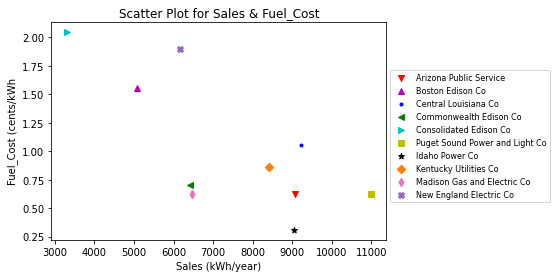

In [186]:
x1 = df['Sales'].values   # .values gives array
y1 = df['Fuel_Cost'].values


# Marker list: https://matplotlib.org/stable/api/markers_api.html
plt.scatter(x1[0], y1[0], marker='v', color='r', label="Arizona Public Service")  # Axis values
plt.scatter(x1[1], y1[1], marker='^', color='m', label="Boston Edison Co")
plt.scatter(x1[2], y1[2], marker='.', color='b', label="Central Louisiana Co")
plt.scatter(x1[3], y1[3], marker='<', color='g', label="Commonwealth Edison Co")
plt.scatter(x1[4], y1[4], marker='>', color='c', label="Consolidated Edison Co")
plt.scatter(x1[5], y1[5], marker='s', color='y', label="Puget Sound Power and Light Co")
plt.scatter(x1[6], y1[6], marker='*', color='k', label="Idaho Power Co")
plt.scatter(x1[7], y1[7], marker='D', color='tab:orange', label="Kentucky Utilities Co")
plt.scatter(x1[8], y1[8], marker='d', color='tab:pink', label="Madison Gas and Electric Co")
plt.scatter(x1[9], y1[9], marker='X', color='tab:purple', label="New England Electric Co")

plt.xlabel("Sales (kWh/year)")  # Sales
plt.ylabel("Fuel_Cost (cents/kWh")  # Fuel_Cost
plt.title('Scatter Plot for Sales & Fuel_Cost')  # Title
plt.legend(scatterpoints=1,loc='upper right',ncol=1,fontsize=8,bbox_to_anchor=(1.5, 0.8))

plt.show()  # Show scatter plot

**Problem 2:** Please perform a k-means clustering on the given data with k = 3 and please show all steps of clustering with a corresponding scatterplot. The raw data should be normalized with Z-score normalization before clustering (mean and standard deviation are given, they are from a large dataset). 
*   *Mean*: Sales = 8,914.05, Fuel_Cost = 1.10
*   *Standard Deviation*: Sales = 3,549.98, Fuel_Cost = 0.56

In [187]:
# Z-score normalization before clustering
# See given means and std_deviations above
# Z-score = (original - mean) / std

zscored_df = df   # New df with z-score normalization applied
del zscored_df['Company']   # k-means cannot handle strings

# Means and Standard Deviations given for larger set
sales_mean = 8914.05
fuel_cost_mean = 1.10
sales_std = 3549.98 
fuel_cost_std = 0.56

# Apply z-score normalization to Sales and Fuel_Cost columns
for i in range(10):  # columns 0-9
  zscored_df['Sales'][i] = (zscored_df['Sales'][i] - sales_mean) / sales_std  # Sales Z-scored
  zscored_df['Fuel_Cost'][i] = (zscored_df['Fuel_Cost'][i] - fuel_cost_mean) / fuel_cost_std   # Fuel_Cost Z-scored

zscored_df

,Sales,Fuel_Cost
0,0,-0.842857
1,-1,0.812500
2,0,-0.075000
3,0,-0.714286
4,-1,1.685714
5,0,-0.857143
6,0,-1.412500
7,0,-0.425000
8,0,-0.851786
9,0,1.423214


[[-2.77555756e-17 -7.39795918e-01]
 [-1.00000000e+00  1.24910714e+00]
 [ 0.00000000e+00  1.42321429e+00]]


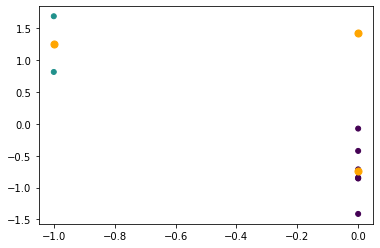

In [223]:
# k-means clustering w/ k=3
kmeans = KMeans(n_clusters=3).fit(zscored_df)   # k = 3
centroids = kmeans.cluster_centers_     # 3 Centroids

print(centroids)    # Print centroid positions

plt.scatter(zscored_df['Sales'], zscored_df['Fuel_Cost'], c=kmeans.labels_.astype(float), s=25, alpha=1.0)    # zscored points are all other colors
plt.scatter(centroids[:,0], centroids[:,1], s=50, c='orange')  # Centroids are orange

plt.show()